<a href="https://colab.research.google.com/github/devsuvendu/Airbnb-bookings-Analysis/blob/main/Airbnb_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# importing all requirement libraries

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:

airbnb_df=pd.read_csv(f"AB_NYC_2019.csv")

In [13]:
#Top five rows
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [14]:
# printing bottom five rows for analysis
airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [15]:
#all columns
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [16]:
#total size of rows and columns
airbnb_df.shape

(48895, 16)

In [17]:
#check the not null values
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [18]:
# describe of object type data in airbnb dataset
airbnb_df.describe(include='object')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


**cleaning the data**


The inplace=True parameter is used to modify the DataFrame in-place, meaning the changes will be applied directly to the DataFrame object without creating a new DataFrame. 

In [19]:
#Drop the columns whose are not requirement
airbnb_df.drop(['latitude','longitude','last_review','reviews_per_month'],axis='columns',inplace=True)

In [20]:
#Requirement of all columns and top five rows
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [21]:
airbnb_df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [22]:
#requirement columns
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Relationship analysis between different variables**

C:\Users\santa\AppData\Local\Temp\ipykernel_19180\1027787296.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation = airbnb_df.corr()


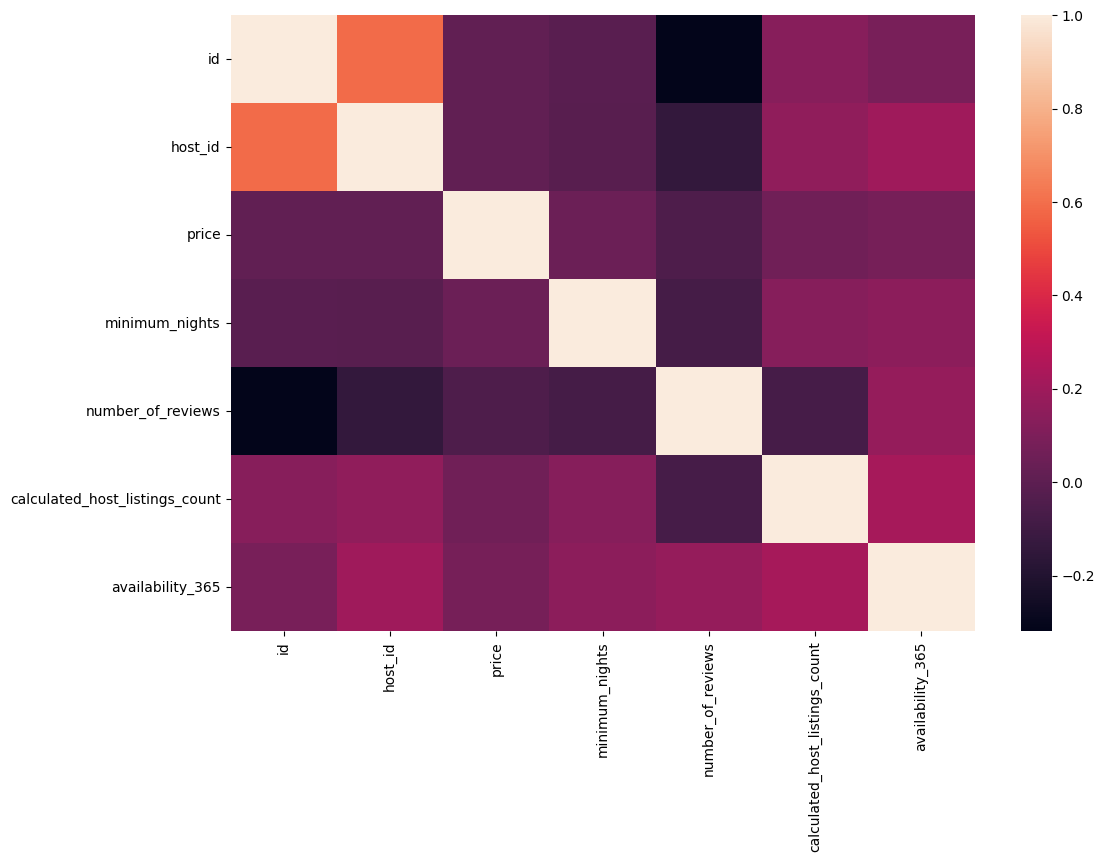

In [23]:
# Correlation or Relationship analysis between different variables in airbnb dataset.
plt.figure(figsize=(12,8))
corelation = airbnb_df.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=False, linewidths=0)
plt.show()

**1.What can we learn about different hosts and areas?**

##### airbnb_df: The DataFrame containing Airbnb data.
##### groupby(['host_name','neighbourhood']): Groups the data based on the 'host_name' and 'neighbourhood' columns.
##### ['calculated_host_listings_count']: Specifies the column on which the count operation is performed within each group.
##### count(): Calculates the count of 'calculated_host_listings_count' for each group.
##### reset_index(): Resets the index of the resulting DataFrame.

In [ ]:
different_host_area=airbnb_df.groupby(['host_name','neighbourhood'])['calculated_host_listings_count'].count().reset_index()
different_host_area.sort_values('calculated_host_listings_count',ascending=False)


,host_name,neighbourhood,calculated_host_listings_count
25263,Sonder (NYC),Financial District,218
13237,John,Hell's Kitchen,55
27583,Vida,Greenpoint,52
25258,Sonder,Financial District,51
25266,Sonder (NYC),Murray Hill,50
...,...,...,...
11064,Ilsa,Prospect Heights,1
11062,Ilona,South Slope,1
11061,Ilona,Sheepshead Bay,1
11060,Ilona,Gowanus,1


In [24]:
areas = airbnb_df.neighbourhood.unique()
areas

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

* sns.countplot(): This function is used to create a count plot, which shows the count of occurrences of each category in a categorical variable.
* x=airbnb_df['neighbourhood']: Specifies the column to be plotted on the x-axis, which is 'neighbourhood' in this case.
* palette="plasma": Sets the color palette for the count plot. The "plasma" palette is specified here, but you can choose any other available palette or omit this parameter to *use the default palette.

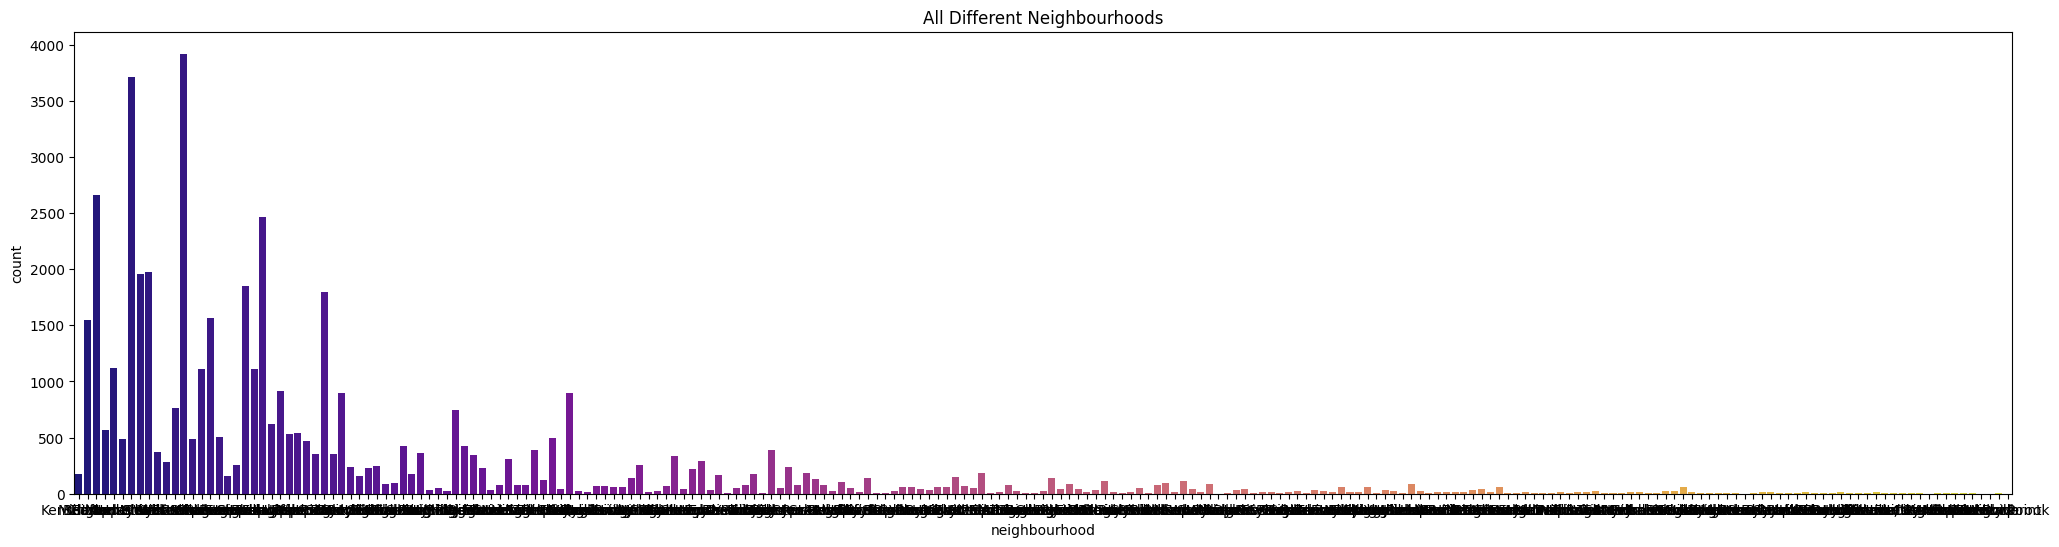

In [25]:
# all different areas
sns.countplot(x = airbnb_df['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('All Different Neighbourhoods')
plt.show()

**2.What can we learn from predictions? (ex: locations, prices, reviews, etc)**

In [26]:
areas_review=airbnb_df.groupby(['name','neighbourhood_group','price','minimum_nights'])['number_of_reviews'].count().reset_index()
sorting_price=areas_review.sort_values('price',ascending=False)

* areas_review: The DataFrame that you want to sort.
* sort_values('price', ascending=False): This method is called on the DataFrame and specifies the column 'price' to be used for sorting. 
* The ascending=False parameter is set to sort the values in descending order.

In [27]:
sorting_price

,name,neighbourhood_group,price,minimum_nights,number_of_reviews
20219,Furnished room in Astoria apartment,Queens,10000,100,1
27223,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,10000,5,1
1112,1-BR Lincoln Center,Manhattan,10000,30,1
2224,2br - The Heart of NYC: Manhattans Lower East ...,Manhattan,9999,30,1
36152,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,9999,99,1
...,...,...,...,...,...
17021,Cozy yet spacious private brownstone bedroom,Brooklyn,0,1,1
40501,Spacious comfortable master bedroom with nice ...,Brooklyn,0,1,1
43823,"Sunny, Quiet Room in Greenpoint",Brooklyn,0,2,1
12955,Coliving in Brooklyn! Modern design / Shared room,Brooklyn,0,30,1


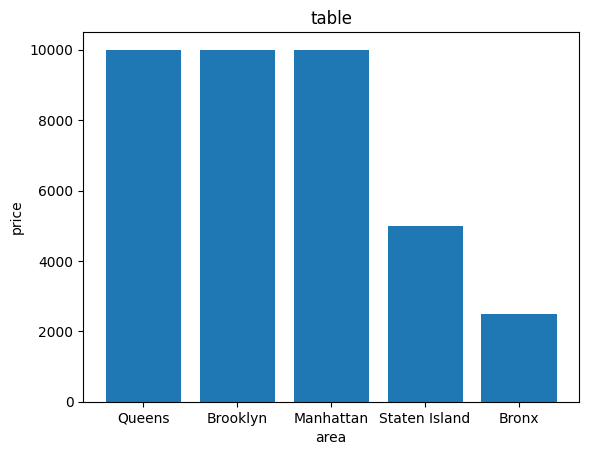

In [28]:
area=sorting_price['neighbourhood_group']
price=sorting_price['price']

plt.bar(area,price)
plt.rcParams['figure.figsize'] = (10,10)
plt.title('table')
plt.xlabel('area')
plt.ylabel('price')
plt.legend
plt.show()

In [29]:
price_review=sorting_price.sort_values('number_of_reviews',ascending=False).head(150)
price_review

,name,neighbourhood_group,price,minimum_nights,number_of_reviews
22522,Hillside Hotel,Queens,135,1,12
26246,Loft Suite @ The Box House Hotel,Brooklyn,199,3,11
4619,Artsy Private BR in Fort Greene Cumberland,Brooklyn,48,30,10
22523,Hillside Hotel,Queens,165,1,5
23571,IN MINT CONDITION-STUDIOS EAST 44TH/UNITED NAT...,Manhattan,175,30,5
...,...,...,...,...,...
41146,Spotless room w/attached bath. Center of Flushing,Queens,80,1,1
26037,Like your cousin house,Queens,80,1,1
7895,Big exposed brick room in The East Village,Manhattan,80,90,1
38054,"Simple, sweet in NOLITA-NYC",Manhattan,80,3,1


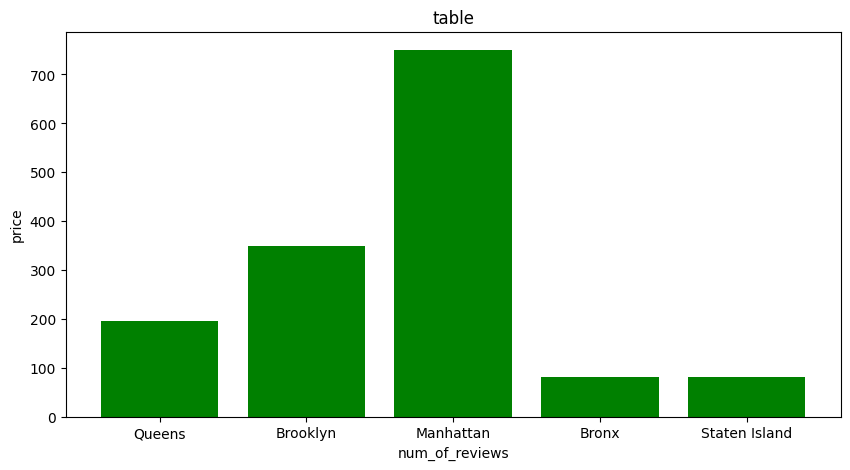

In [31]:
area=price_review['neighbourhood_group']
review=price_review['price']

plt.rcParams['figure.figsize']=(10,5)
plt.bar(area,review,color='g')
plt.title('table')
plt.xlabel('num_of_reviews')
plt.ylabel('price')
plt.show()

**3.Which hosts are the busiest and why?**

In [33]:
busiest_host=airbnb_df.groupby(['host_name','neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
busiest_host


,host_name,neighbourhood_group,room_type,minimum_nights
0,'Cil,Queens,Private room,1
1,(Ari) HENRY LEE,Manhattan,Entire home/apt,1
2,(Email hidden by Airbnb),Brooklyn,Entire home/apt,2
3,(Email hidden by Airbnb),Manhattan,Entire home/apt,1
4,(Email hidden by Airbnb),Manhattan,Private room,3
...,...,...,...,...
19144,빈나,Manhattan,Private room,1
19145,소정,Brooklyn,Private room,1
19146,소정,Manhattan,Private room,1
19147,진,Manhattan,Entire home/apt,1


In [34]:
valueable_host=busiest_host.sort_values('minimum_nights',ascending=False).head(7)
valueable_host

,host_name,neighbourhood_group,room_type,minimum_nights
16549,Sonder (NYC),Manhattan,Entire home/apt,319
2295,Blueground,Manhattan,Entire home/apt,230
12299,Michael,Manhattan,Entire home/apt,143
9190,Kara,Manhattan,Entire home/apt,129
4128,David,Manhattan,Entire home/apt,117
12438,Mike,Manhattan,Entire home/apt,109
545,Alex,Manhattan,Entire home/apt,98


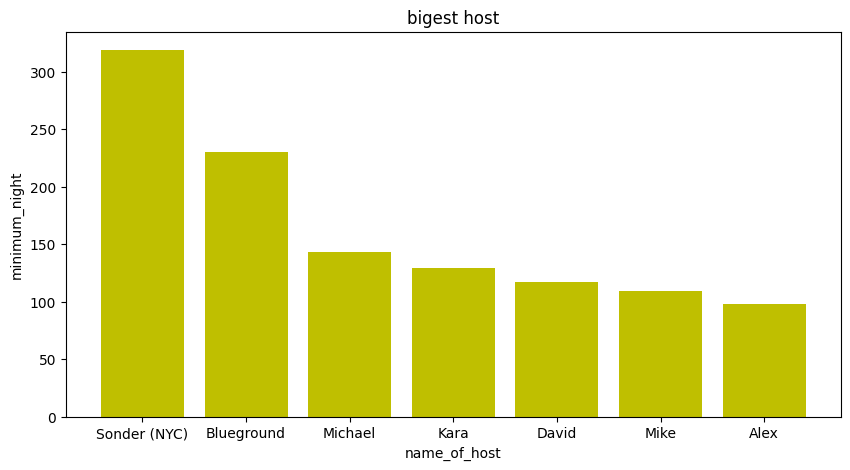

In [36]:
hosts = valueable_host['host_name']
min_nights = valueable_host['minimum_nights']
plt.bar(hosts,min_nights,color='y')
plt.title('bigest host')
plt.xlabel('name_of_host')
plt.ylabel('minimum_night')
plt.show()

# The highest hoost are 1.sonder(NYC) 2.Blueground 3.Michael

**4.Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

In [37]:
different_trafic_areas=airbnb_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
different_trafic_areas.sort_values('minimum_nights',ascending=False)

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


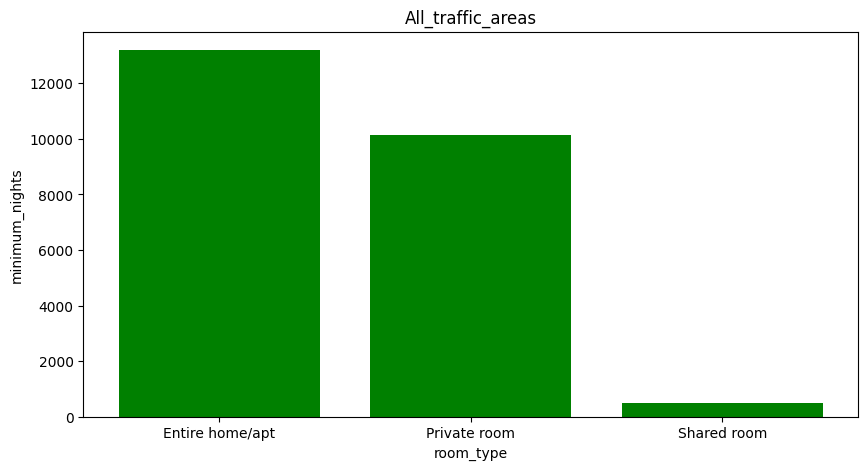

In [38]:
area=different_trafic_areas['room_type']
night=different_trafic_areas['minimum_nights']

plt.bar(area,night,color='g')
plt.title('All_traffic_areas')
plt.xlabel('room_type')
plt.ylabel('minimum_nights')
plt.show()

**Finding Total count of each room types?**

In [39]:
air_bnb_roomtype=airbnb_df.room_type.unique()

In [40]:
air_bnb_roomtype

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [41]:
air_bnb_roomtype_frequency=dict(airbnb_df.room_type.value_counts())

In [42]:
air_bnb_roomtype_frequency

{'Entire home/apt': 25409, 'Private room': 22326, 'Shared room': 1160}

**room availabel per Neighbourhood Group**

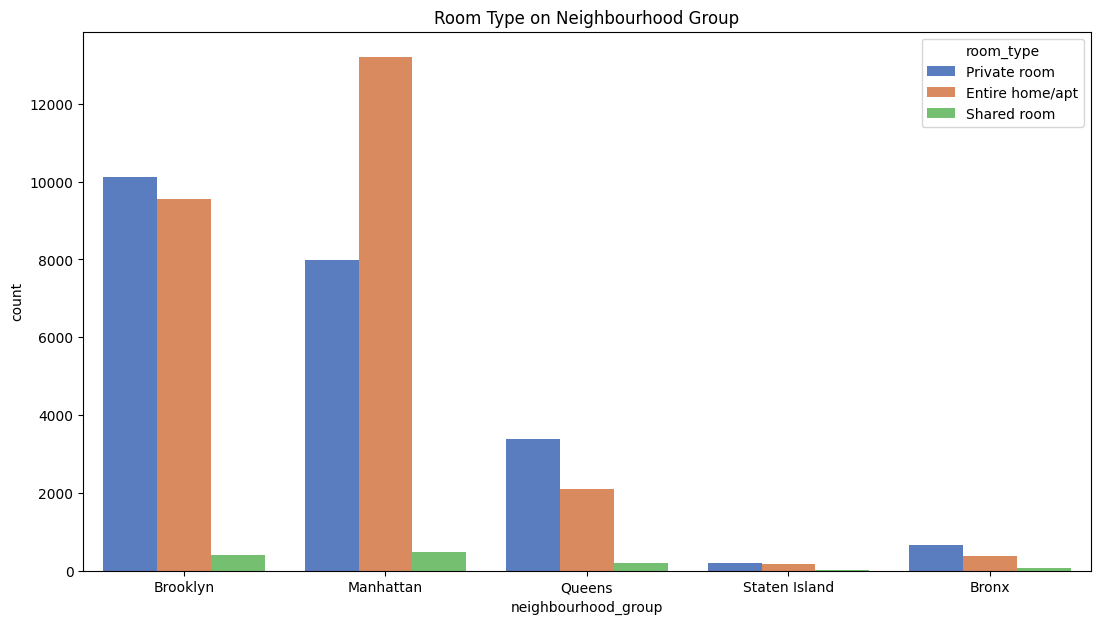

In [43]:

plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(x = airbnb_df.neighbourhood_group, hue = airbnb_df.room_type, palette="muted")
plt.show()


**Price on diffrent neighbourhood_group**

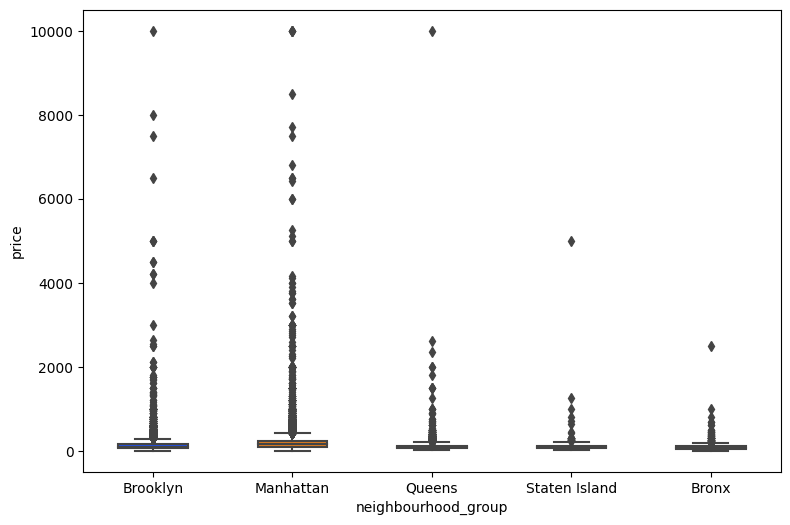

In [44]:
# price on diffrent neighbourhood_group
plt.figure(figsize=(9,6))
sns.boxplot(data = airbnb_df, x='neighbourhood_group', y='price',palette='bright', width=0.5)
plt.show()

**Rooms availabilty in different areas**

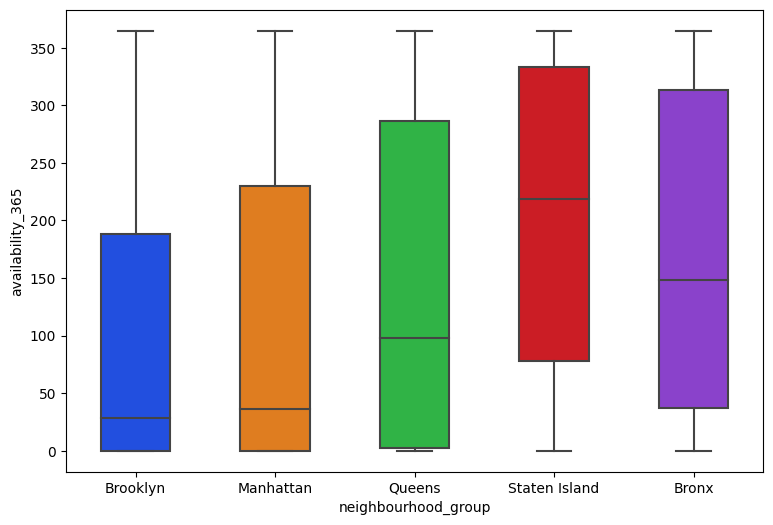

In [45]:
# rooms availabilty in different areas
plt.figure(figsize=(9,6))
sns.boxplot(data = airbnb_df, x='neighbourhood_group', y='availability_365',palette='bright', width=0.5)
plt.show()

**The project of analysis the data staying people are Entire home/apt or private which are present in Manhattan,Brooklyn,Queens are in less price.**